In [39]:
# Imports
import csv
import numpy as np
import numpy as np
import math
%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
from scipy.cluster.vq import kmeans,vq
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA as sklearnPCA

/Users/AlecZ/Developer/lab_work/venv/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [40]:
# Constants
GENOMIC_FILE = "real_data/genomicMatrix"
ROW_LIMIT = 1000

In [80]:
# Read
f = open(GENOMIC_FILE, "rb")
c = csv.reader(f, delimiter='\t', quotechar="'", quoting=csv.QUOTE_ALL)
i = 0
m = []
first = True
for row in c:
    if first == True:
        first = False
        continue
    if i > ROW_LIMIT:
        break
    r2 = row[1:]
    success = True
    for col in r2:
        try:
            fl = float(col)
        except Exception:
            success = False
    if success:
        m.append(r2)
    i += 1
f.close()
matrix = np.matrix(m, dtype="float")
matrix

matrix([[ 30.8463,  55.5017,  47.5469, ...,  43.9962,  48.491 ,  75.0832],
        [ 22.2283,  21.1961,  23.4013, ...,  98.0276,  89.437 ,  11.4914],
        [  0.    ,   0.    ,   0.    , ...,   0.    ,   1.9781,   2.4787],
        ..., 
        [  5.0776,   0.    ,   5.9016, ...,   0.    ,   5.1007,   0.    ],
        [ 66.8737,  69.1558,  69.6741, ...,  67.0578,  75.1718,  76.6358],
        [ 50.    ,  51.8167,  63.3989, ...,  49.3838,  73.9885,  57.0698]])

In [83]:
def plot(m, dim_0=0, dim_1=1, x_label="x", y_label="y"):
    # Plot and output matrix

    plt.plot(m[:,dim_0], m[:,dim_1], 'o', markersize=7, 
             color='blue', alpha=0.5, label='celldata')

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    # plt.xlim([-10,110])
    # plt.ylim([-10,110])
    plt.title('Transformed samples without dropout rate')

    return plt.show()

In [84]:
# PCA

pca1 = sklearnPCA(n_components=5)
fitted1 = pca1.fit(matrix)
trans1 = pca1.transform(matrix)
shape(trans1)

(999, 5)

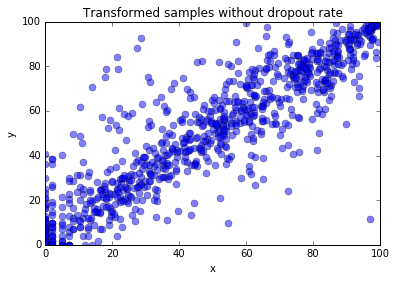

In [85]:
plot(matrix)

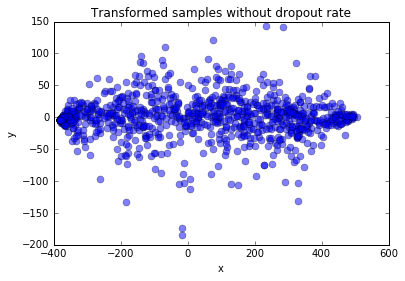

In [86]:
plot(trans1)